In [219]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import math
import matplotlib.tri as mtri

In [220]:
df = pd.read_csv('emade.csv')

In [221]:
p = df[['FullDataSet False Positives', 'FullDataSet False Negatives', 'FullDataSet Num Elements']].values.tolist()
print(p)

[[18.8, 19.0, 35.0], [16.0, 36.4, 27.0], [16.2, 21.8, 44.0], [18.8, 19.0, 35.0], [0.0, 68.4, 29.0], [16.0, 36.4, 27.0], [103.6, 7.4, 41.0], [16.2, 21.8, 44.0], [18.8, 19.0, 35.0], [0.0, 68.4, 29.0], [16.0, 36.4, 27.0], [103.6, 7.4, 41.0], [16.2, 21.8, 44.0], [18.8, 19.0, 31.0], [0.0, 68.4, 29.0], [103.6, 7.4, 41.0], [16.2, 21.8, 44.0], [10.6, 47.8, 30.0], [18.8, 19.0, 31.0], [0.0, 68.4, 29.0], [16.0, 36.4, 27.0], [103.6, 7.4, 41.0], [16.2, 21.8, 44.0], [10.6, 47.8, 30.0], [18.8, 19.0, 31.0], [16.6, 21.4, 51.0], [0.0, 68.4, 29.0], [16.0, 36.4, 27.0], [103.6, 7.4, 41.0], [16.2, 21.8, 42.0], [10.6, 47.8, 30.0], [18.8, 19.0, 31.0], [16.6, 21.4, 51.0], [0.0, 68.4, 29.0], [16.0, 36.4, 27.0], [103.6, 7.4, 41.0], [16.2, 21.8, 42.0], [10.6, 47.8, 30.0], [15.4, 26.0, 25.0], [18.8, 19.0, 31.0], [16.6, 21.4, 50.0], [0.0, 68.4, 29.0], [16.0, 36.4, 27.0], [103.6, 7.4, 41.0], [16.2, 21.8, 42.0], [104.4, 13.8, 33.0], [10.6, 47.8, 35.0], [10.6, 47.8, 30.0], [15.4, 26.0, 25.0], [18.8, 19.0, 31.0], [16.6

(46, 3) (94, 3)


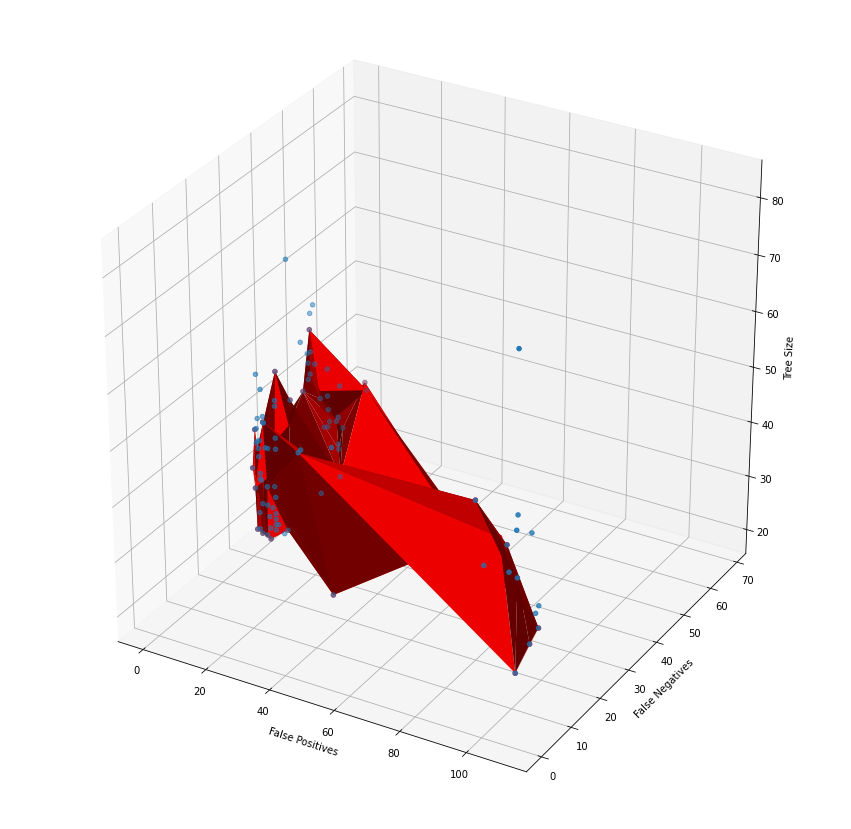

In [222]:
def simple_cull(inputPoints, dominates):
    paretoPoints = set()
    candidateRowNr = 0
    dominatedPoints = set()
    while True:
        candidateRow = inputPoints[candidateRowNr]
        inputPoints.remove(candidateRow)
        rowNr = 0
        nonDominated = True
        while len(inputPoints) != 0 and rowNr < len(inputPoints):
            row = inputPoints[rowNr]
            if dominates(candidateRow, row):
                # If it is worse on all features remove the row from the array
                inputPoints.remove(row)
                dominatedPoints.add(tuple(row))
            elif dominates(row, candidateRow):
                nonDominated = False
                dominatedPoints.add(tuple(candidateRow))
                rowNr += 1
            else:
                rowNr += 1

        if nonDominated:
            # add the non-dominated point to the Pareto frontier
            if not math.isnan(candidateRow[0]):
                paretoPoints.add(tuple(candidateRow))

        if len(inputPoints) == 0:
            break
    return paretoPoints, dominatedPoints

def dominates(row, candidateRow):
    return sum([row[x] <= candidateRow[x] for x in range(len(row))]) == len(row)  

paretoPoints, dominatedPoints = simple_cull(p, dominates)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dp = np.array(list(dominatedPoints))
pp = np.array(list(paretoPoints))
print(pp.shape,dp.shape)
ax.scatter(dp[:,0],dp[:,1],dp[:,2])
ax.scatter(pp[:,0],pp[:,1],pp[:,2],color='red')


triang = mtri.Triangulation(pp[:,0],pp[:,1])
ax.plot_trisurf(triang,pp[:,2],color='red')
ax.set_xlabel('False Positives')
ax.set_ylabel('False Negatives')
ax.set_zlabel('Tree Size')
plt.show()

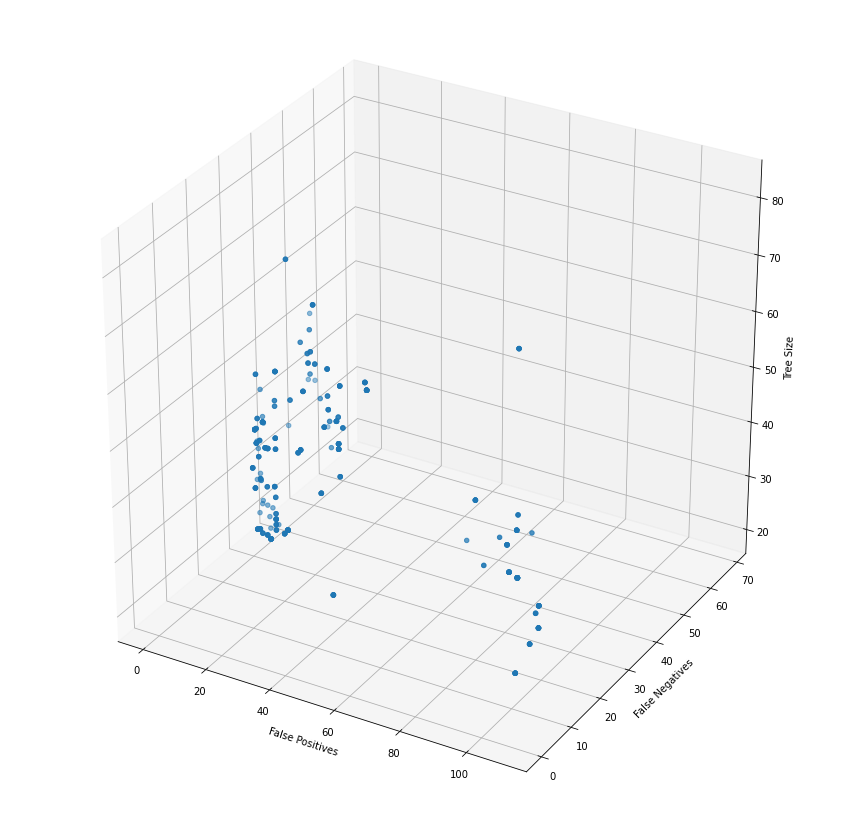

In [223]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['FullDataSet False Positives'], df['FullDataSet False Negatives'], df['FullDataSet Num Elements'])
plt.rcParams["figure.figsize"] = (15, 15)
ax.set_xlabel('False Positives')
ax.set_ylabel('False Negatives')
ax.set_zlabel('Tree Size')
plt.show()